<font color ='Navy'><center> __EMship+(Advanced Design of Sustainable
Ships and Offshore Structures)__ </center></font>
<br> Offshore Structures & Digital Twin <br>  __Structural health monitoring for offshore structures__ <br> 
***
***
<font color='Navy' size=6><b><center>Working with experimental data</center></b></font> 
***
    
<div class="alert alert-block alert-info">
<center><b>Don't forget: It is important that you run each cell of the notebook. To do so select a cell (it will be highlighted) and press shift+enter on your keyboard or the play button in the menu above.</b></center></div> 

In [ ]:
# let's import both numpy and matplotlib.pyplot 
# the "as" in the code bellow is to tell python that if we reference to the package using np and plt 
import numpy as np
import matplotlib.pyplot as plt 
# %matplotlib notebook

# Signal processing

Before we start working with real-world data it is important to refresh our knowledge about some of the most important signal processing concepts. In this section we will:

- Talk about sampling and sampling frequencies
- Refresh our knowledge about the Fourier Transform
- Talk about working with finite length measurements

Once we have those covered we can safely dive into some real-world measurements.

## Selecting the right sampling frequency

A first key concept when it comes to measurements is related to so-called sampling. 

When we look at a vibration this is a continuous process. Sadly this is not how measurement hardware works. Measurement hardware will collect samples only at fixed intervals. The rate at which we collect samples is typically referred to as the *sampling rate* or *sampling frequency* $f_s = 1/\Delta{}t$ expressed in _Hz_.

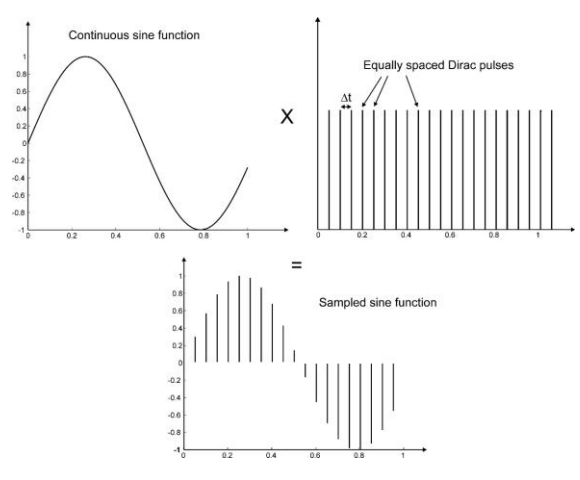

With the introduction of the concept of the sample frequency, we need to answer the question 'What sampling frequency do we need?'
<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.1:</b>  Consider the following continuous signal (gray) which shows e.g. a vibration response to a harmonic load, i.e. a sinoid. In orange we see the samples we collect using our measurement device. Assess what happens when you vary the sampling frequency and the signals frequency. 
</div>

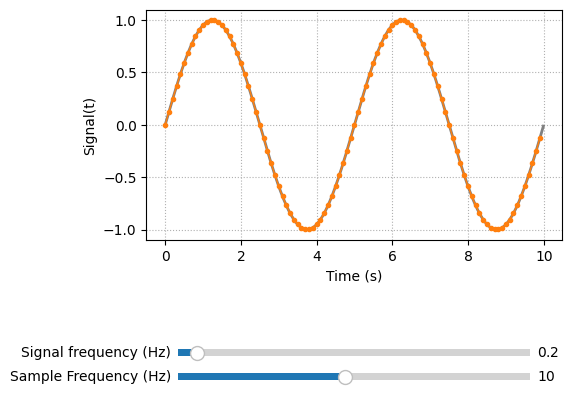

In [2]:
import iplot.interactive_plot_0 as ip
ip.plot_interactive()

In the field below answer following questions:
- When was the sampling frequency  insufficient to capture the true nature of the signal? What happens?
- Did the same sampling frequency work for all signal frequencies?
- Based on your observations what is a good rule of thumb to capture the frequency content of the signal?
- Are you aware of a 'Theorem' that confirms your observations? 

<details>
    <summary><b> Click to get the answer</b></summary>
    Shannon's Theorem states that you should always sample at twice the frequency of the signal of interest. This should also be observed, when they lower their sampling frequency too low the apparent frequency becomes much lower.
</details> 

## Diving into the frequency domain

One of the most important ways to analyse vibration data is to look at the spectrum. For this the Fourier Transform is used:

$X(\omega)= \int_{-\infty }^{+\infty}x(t)e^{-j2\pi\omega{}t}dt$

Which is typically implemented as the Fast Fourier Transform (FFT) and which is obviously available from `numpy` as `fft`, there is also a second function called `fftfreq` which returns the corresponding frequency values for a result of the FFT. Both can be found in the module `np.fft`

Let us try to make a function `calc_spectrum` that returns both the FFT transform and the corresponding frequency vector.

**TIP:** To return two statements just use a comma between the two return statements e.g.: `return a, b` returns both `a` and `b` . So e.g. in the example below both the sum and the product of `a` and `b` are returned and stored in `my_sum` and `my_product`
 
``` python
def sum_and_product(a,b):
    return a+b, a*b

my_sum, my_product = sum_and_product(10,60)
```

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.2:</b> Finish `calc_spectrum` so it returns the FFT and the corresponding frequency values for any given `signal` (= a numpy array). First return the frequencies and then the corresponding FFT values.
</div>


In [3]:
def calc_spectrum(signal, fs):
    """
    Calculates the FFT spectrum of signal sampled at the frequency fs
    
    signal - the signal of which you want to calculate the fft spectrum
    fs  - the sampling frequency in Hz
    
    returns:
    fft_freq - the frequency vector
    fft_value - the results of the 
    
    """
    from numpy.fft import fft, fftfreq, fftshift # We already imported the functions you'll need
    
    ### BEGIN SOLUTION
    
    # As a tip you can point people to google for the documentation
    fft_values = fft(signal)/fs # 
    fft_freq = fftfreq(len(signal), 1/fs) # NOTE: 1/fs!!! 
    
    ### END SOLUTION

    ## This additional step makes the plots look better, no need to worry about it :-)
    fft_values = fftshift(fft_values)
    fft_freq = fftshift(fft_freq)
        
    return fft_freq, fft_values

To check your implementation of `calc_spectrum`,   let us now generate a sinoid at a frequency of 2Hz, sampled at 25Hz and 100s long. We will use that to feed it into our function.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.3:</b> Finish `make_sinoid` to generate a sine wave and its corresponding timevector `t`
</div>

**TIP** Remember `np.arange` is an easy command to generate a vector with equidistant samples. Use it to generate a timevector `t`

In [4]:
def make_sinoid(f,fs, duration):
    """
    Make a sine wave of a given frequency `f` with amplitude 1 and a given `duration` in seconds, sampled at frequency `fs`
    
    Returns;
    t      -  the timevector
    sinoid -  the sine wave
    """
    ### BEGIN SOLUTION
    t = np.arange(start=0, stop=duration, step=1/fs)
    sinoid = np.sin(2*np.pi*f*t) 
    ### END SOLUTION
    
    return t, sinoid


Before we continue let us check your `make_sinoid`. We'll do so by using it to generate a sine wave at 2 _Hz_ and sampled at 25 _Hz_ called `my_sinoid` and the corresponding time vector `t` of 100s.


In [5]:
t, my_sinoid = make_sinoid(2, fs=25, duration=100)


assert len(my_sinoid) == 2500, 'There is something wrong with the number of samples'
assert (t[1]-t[0]) == 0.04, 'We expect a dt of 0.04s'
assert max(my_sinoid) <= 1, 'There is something wrong with the amplitude of my_sinoid'
assert min(my_sinoid) >= -1, 'There is something wrong with the amplitude of my_sinoid'
assert np.abs(np.mean(my_sinoid)) < 1e-10, 'There is something wrong with the mean value of my_sinoid'


### BEGIN HIDDEN TESTS
fs_t = 25
f_t = 2
t_t = np.arange(start=0, stop=100, step=1/fs_t)
np.testing.assert_array_almost_equal(my_sinoid, np.sin(2*np.pi*f_t*t_t))
### END HIDDEN TESTS

Ok now let us verify your results:

In [6]:
from math import isclose
f_my_sinoid, fft_my_sinoid = calc_spectrum(my_sinoid, 25)

assert np.abs(f_my_sinoid[np.argmax(np.abs(fft_my_sinoid))]) == 2.0, "The highest value of the FFT should be at 2Hz"
assert isclose(np.max(np.abs(fft_my_sinoid)), 50), "Something is wrong with the amplitude of your FFT"
assert isclose(np.abs(f_my_sinoid[1] - f_my_sinoid[0]),  0.01)
assert max(f_my_sinoid) == (25/2-0.01)


Time to visualize your results.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.4:</b> Use matplotlib's `plt.plot` to plot the amplitude spectrum of your sinoid. Make sure that the axis are correct and the peaks of the spectrum align with your results!
</div>

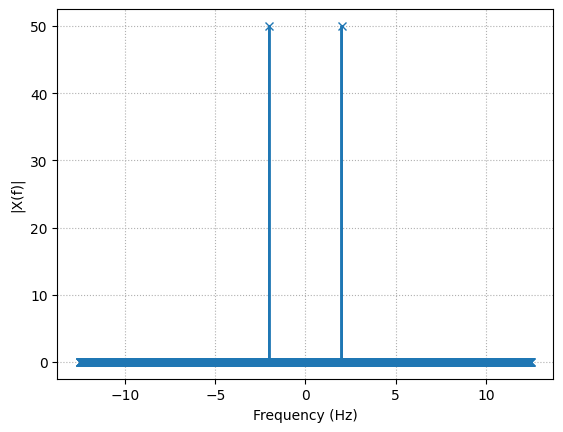

In [7]:
plt.figure()
### BEGIN SOLUTION
plt.plot(f_my_sinoid, np.abs(fft_my_sinoid), marker='x')
plt.grid(which='both', linestyle=':')
### END SOLUTION
plt.ylabel('|X(f)|')
plt.xlabel('Frequency (Hz)')
plt.show()

## Working with finite time measurements

A key concept in working with experimental data is the fact that our measurement windows have a finite length $T$. Simply put we can't measure into infinity and we have no opportunity to go back into the past. Our measurement window thus ranges from 0 to $T$. However, the Fourier transform has limits from $-\infty$ to $+\infty$.

To mitigate the FFT uses a trick, copy-pasting the limited window until we have an infinite signal. In the widget below this behaviour is simulated for different lengths of the window $T$. Use the widget to understand the importance of the right window length.

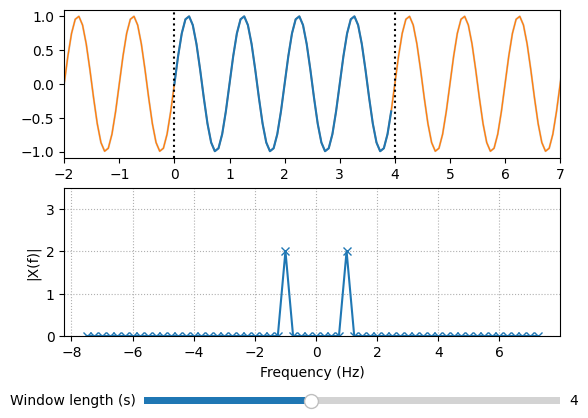

In [8]:
import iplot.interactive_plot_1 as ip
ip.plot_interactive()

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.5:</b> At which window lengths did you obtain the best results, i.e. a spectrum that is the closest to the theoretical spectrum? What do you think goes wrong for other window lengths? 
</div>

<details>
    <summary><b> Click to get the answer</b></summary>
    The best results are obtained when the window length is an integer multiple of the original signal. For the other window lengths the copy-paste doesn't work perfectly, and a 'transient' appears at the edges of the window. As a result energy leaks into other frequencies.
</details> 

In the cell below define values `good_window_length` and `bad_window_length` for a signal at 1_Hz_ (like in the widget), with respectively a ideal window length and bad one which introduces lots of **Leakage**.

In [9]:
###BEGIN SOLUTION
good_window_length = 5.0
bad_window_length = 3.35
###END SOLUTION

Let us just to some basic checks (mainly to keep the computational effort low):

In [10]:
assert good_window_length<7, "Please keep the window length less than 7s"
assert bad_window_length<7, "Please the window length less than 7s"

###BEGIN HIDDEN TESTS
assert int(good_window_length)== good_window_length
###END HIDDEN TESTS

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.6:</b> In the cell below use `make_sinoid` to generate two sines at 1 _Hz_ sampled at 15 _Hz_, one of duration `good_window_length` and one with the duration of `bad_window_length`, call them `good_sine` and `bad_sine`. Then use the FFT using `calc_spectrum` to calc the spectra of both. Name the resulting frequency vectors `f_bad` and `f_good` and the spectra `fft_bad` and `fft_good`.
</div>

In [11]:
### BEGIN SOLUTION
fs = 15
_, good_sine =make_sinoid(1,fs,good_window_length)
_, bad_sine = make_sinoid(1,fs,bad_window_length)

f_bad, fft_bad = calc_spectrum(bad_sine, fs)
f_good, fft_good = calc_spectrum(good_sine, fs)

### END SOLUTION

Ok let us have a look at your results.

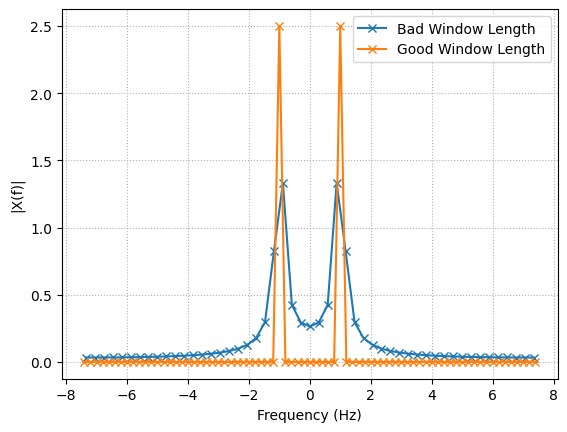

In [12]:
assert len(good_sine) == int(good_window_length*15), "The duration is not correct"
assert np.abs(len(bad_sine)-int(bad_window_length*15)) <= 1, "The duration is not correct" # This can be one sample off due to rounding
assert int(len(bad_sine)/15) != len(bad_sine)/15 , "This is not a bad window length"

# Let us also plot your results
plt.figure()
plt.plot(f_bad, np.abs(fft_bad), marker='x', label='Bad Window Length')
plt.plot(f_good, np.abs(fft_good), marker='x', label='Good Window Length')
plt.grid(which='both', linestyle=':')
plt.ylabel('|X(f)|')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

There are two routes to avoid **Leakage** obviously we can optimize our window length to avoid this effect all together. However, this only works of periodical signals! Another option we have is to use windows. A common selection is to use the Hanning window. Which is available from  `scipy.signal.windows` as `hann`.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.7:</b> Import `hann` from `scipy` and apply a Hanning window to `bad_sine`, call the result `bad_sine_hann`. Compute the resulting spectrum and save it as `f_bad_hann`  and `fft_bad_hann`.
</div>

In [13]:
### BEGIN SOLUTION
from scipy.signal.windows import hann

bad_sine_hann = bad_sine*hann(len(bad_sine))
f_bad_hann, fft_bad_hann = calc_spectrum(bad_sine_hann, fs)

### END SOLUTION

And let us have a look at the impact:

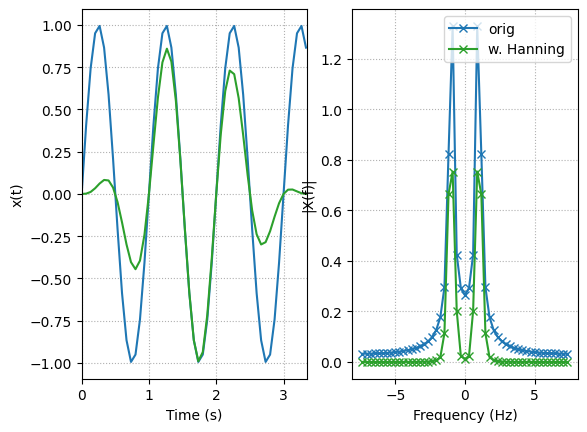

In [14]:
assert len(bad_sine) == len(bad_sine_hann), "The duration should not change when applying a Hanning window"
assert not np.allclose(bad_sine, bad_sine_hann)

### Let us plot
# The timeseries
fig, ax = plt.subplots(1,2)
t_p = np.arange(0, len(bad_sine))/15
ax[0].plot(t_p, bad_sine, color='tab:blue', label='orig')
ax[0].plot(t_p, bad_sine_hann, color='tab:green', label='w. Hanning')
ax[0].set_xlim([0, bad_window_length])
ax[0].grid(which='both', linestyle=':')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('x(t)')
# The spectrum
ax[1].plot(f_bad, np.abs(fft_bad),marker='x', color='tab:blue', label='orig')
ax[1].plot(f_bad, np.abs(fft_bad_hann),marker='x', color='tab:green', label='w. Hanning')
ax[1].grid(which='both', linestyle=':')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|X(f)|')
plt.legend()

### BEGIN HIDDEN TESTS

from scipy.signal.windows import hann
assert np.allclose(bad_sine_hann, bad_sine*hann(len(bad_sine))) 

### END HIDDEN TESTS

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.8:</b> In the cell below answer the question, what is the impact of using the Hanning window. Are the results as good as the best possible result, i.e. when using a proper window length?
</div>

<details>
    <summary><b> Click to get the answer</b></summary>
    The hanning window improves the spectrum but Leakage artefacts are still visible. It isn't a perfect solution, in part because the original signal gets modified. It is however a step in the right direction.
</details> 

# Offshore wind turbine
## Context

In today's session we will analyse the measurement data from an offshore wind turbine. The measurements that were shared are from two accelerometers installed in the nacelle of the wind turbine. The nacelle is the box at the top of the tower that houses the main drive shaft, gearbox and generator. We call the direction aligned with the wind direction the Fore-Aft direction (FA) and the direction cross-wind the sideways (SS) direction.

We will use the measurement to analyze the dynamic properties of the wind turbine and investigate it's susceptibility to different types of loading.  

<br><center><b>Figure 1: Two offshore wind turbines</b></center>
<img src="https://ilvo.vlaanderen.be/uploads/images/_900xAUTO_fit_center-center_none/RS2522_Thornton.jpg" width="600">


<div class="alert alert-block alert-info">
In the following exercices, we will use the same libraries as the one used in the previously. But we'll add a new package called `pandas`. `pandas` is a very useful package when it comes to importing and processing big datasets. It can handle all types of data and today we will use it to import measurement data. We'll use it later on in the session.
</div>

## Exercise 2: the rotor stop
To start the exercise we will first import some data from an actual offshore wind turbine in the North sea.
For this purpose we will use the package `pandas` and the `read_csv` command to read data from a csv file with the data stored in it. Once imported the data is stored in a so-called `Dataframe` (hence why we call it `df`). Using the `df.head()` command we show the first five lines of the Dataframe.

In [15]:
import pandas as pd

df = pd.read_csv('offshore_wind_data_rotor_stop.csv', header=0)
df.head()

,t [s],FA [g],SS [g]
0,0.00,-0.004464,0.009247
1,0.04,-0.003821,0.007874
2,0.08,-0.004222,0.007740
3,0.12,-0.004667,0.008032
4,0.16,-0.004643,0.009867



<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">
<b> Assignment 1.3:</b>  Use the cell below to find key information about the measurement dataset. Define:

        - The sample frequency in Hz: `f_s`
        - The duration in s: `t_e`
        - The measurement unit of the acceleration: `unit_str`
 </div>
<div class="alert alert-block alert-info">
<center><b>Tips: to learn how to access/index pandas dataframe check this  
    <a href="http://datacamp-community-prod.s3.amazonaws.com/f04456d7-8e61-482f-9cc9-da6f7f25fc9b">link. </a> <br>
   To find the duration t_e, you either have to access the last row of the pandas dataframe or you have to compute the length of the dataframe
 </b></center></div>



In [16]:
###BEGIN SOLUTION
f_s = 25 #Hz
t_e = 600 #s
unit_str = 'g'
###END SOLUTION

Some small checks

In [17]:
assert f_s*t_e == len(df) # See if the total number of samples adds up

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.2:</b> use the `plt.plot` command to visualize the measurement data.
</div>


<div class="alert alert-block alert-info">
<center><b>Tips: Make your plot beautiful by adding: grid, legend, xlabel and ylabel. Google is your friend   
 </b></center></div>

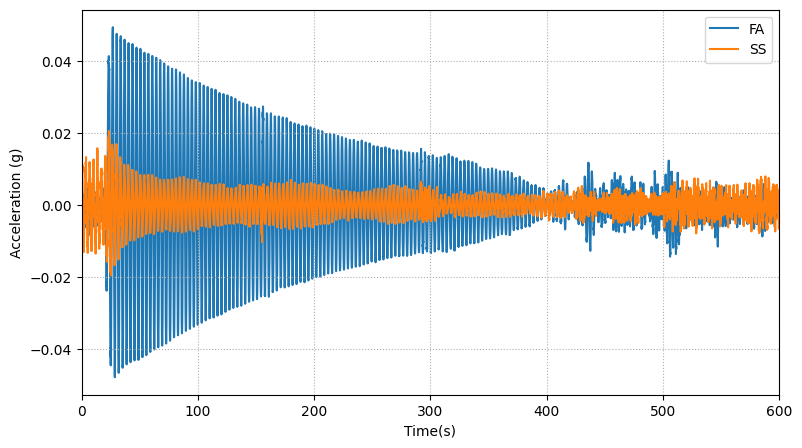

In [18]:
plt.figure(figsize=(9,5))

###BEGIN SOLUTION
plt.plot(df['t [s]'],df['FA [g]'], label='FA',zorder=1)
plt.plot(df['t [s]'],df['SS [g]'], label='SS',zorder=2)

plt.xlim([0,600])
plt.legend()
plt.grid(which='both', linestyle=':')
plt.xlabel('Time(s)')
plt.ylabel(f'Acceleration ({unit_str})')
###END SOLUTION

plt.show()

In this dataset the turbine performs a so-called **rotor stop**, during a rotor stop the turbine shuts down and the wind load is released. In this video you can see an onshore wind turbine do a rotor stop:


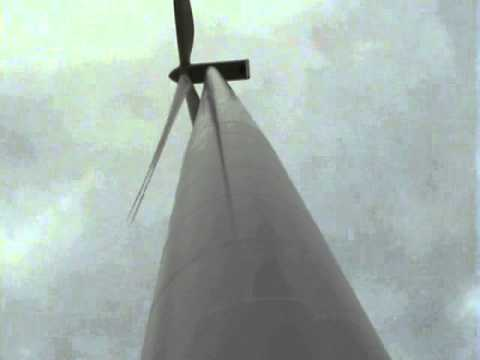

In [19]:
from IPython.display import YouTubeVideo, Markdown

YouTubeVideo('_qVXkAWtH60', width=800, height=300)

In a way you could look at this rotor stop as an impulse response, so let us try to determine some of the wind turbine properties from it.
<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.3:</b> Can you isolate the data from the rotor stop in the FA direction? Use `df.to_numpy` to extract data from a  dataframe into a numpy array (which is what we used in the previous sessions). Store your variable as `fa_rotor_stop`, also store the corresponding timevector (t=0s, on the rotor stop) in `t_rotor_stop`.
</div>

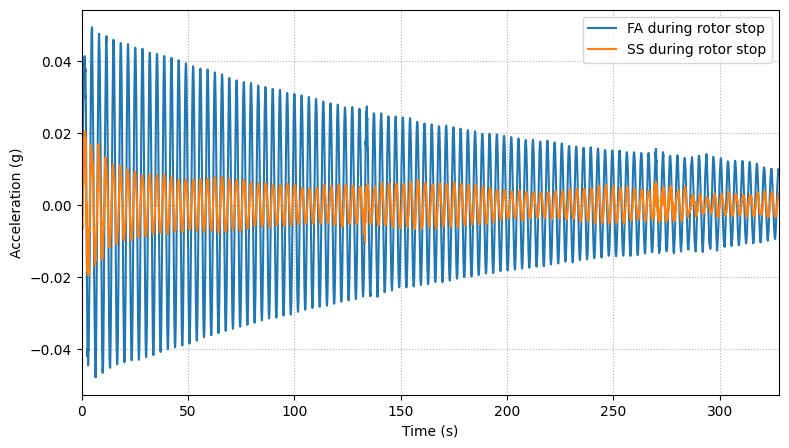

In [20]:
###BEGIN SOLUTION
fa_rotor_stop = df['FA [g]'].iloc[22*f_s:350*f_s]
t_rotor_stop = np.array(range(len(fa_rotor_stop)))/f_s

fss_rotor_stop = df['SS [g]'].iloc[22*f_s:350*f_s]
tss_rotor_stop = np.array(range(len(fss_rotor_stop)))/f_s
###END SOLUTION

plt.figure(figsize=(9,5))

plt.plot(t_rotor_stop, fa_rotor_stop, label='FA during rotor stop')
plt.plot(tss_rotor_stop, fss_rotor_stop, label='SS during rotor stop')
plt.xlim([t_rotor_stop[0], t_rotor_stop[-1]])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.grid(which='both', linestyle=':')
plt.legend()
plt.show()

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.4:</b> Convert the impulse response data to the frequency domain using `calc_spectrum` and plot the resulting spectra. Use these spectra to estimate the first natural frequency of the structure. Utilize the `plt.semilogy()` function from matplotlib to achieve a logarithmic y-axis scale.

</div>

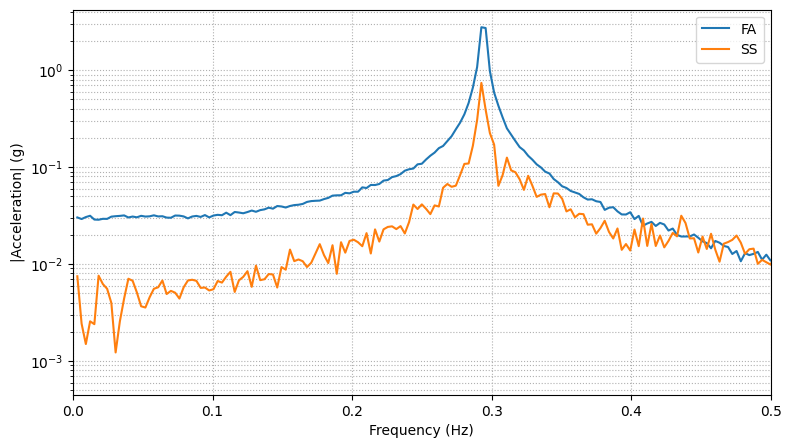

In [21]:
plt.figure(figsize=(9,5))

###BEGIN SOLUTION

f, X = calc_spectrum(fa_rotor_stop, fs=f_s)
fss, Xss = calc_spectrum(fss_rotor_stop, fs=f_s)
f_mask_FA = np.logical_and(f>0, f<1)
f_mask_SS = np.logical_and(fss>0, fss<1)



fh = int(len(f)/2)
plt.semilogy(f[f_mask_FA], np.abs(X[f_mask_FA]), label='FA')
plt.semilogy(fss[f_mask_SS], np.abs(Xss[f_mask_SS]), label='SS')
plt.xlim([0,0.5])
###END SOLUTION

plt.xlabel('Frequency (Hz)')
plt.ylabel('|Acceleration| (g)')
plt.grid(which='both', linestyle=':')
plt.legend()
plt.show()


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.4b:</b> What resonance frequency do you conclude for this structure? Set a variable `w_n` accordingly (best in rad/s).

</div>

In [22]:
###BEGIN SOLUTION
w_n = 0.295 * 2 *np.pi # rad/s
###END SOLUTION


And let us check 

In [23]:
###BEGIN HIDDEN TESTS
assert (abs(w_n- 1.85) <0.25)
###END HIDDEN TESTS

Finally we need to talk about the damping ratio. Do you already have a rough estimate of the damping value? Is it 0.1%, 1% or 10% damping. We can try to answer this by fitting the exponential decay of the impulse response to the data.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.5:</b> Using the widget below can you match the damping ratio of the wind turbine? What value do you find, for the damping? Does that seem possible?

</div>

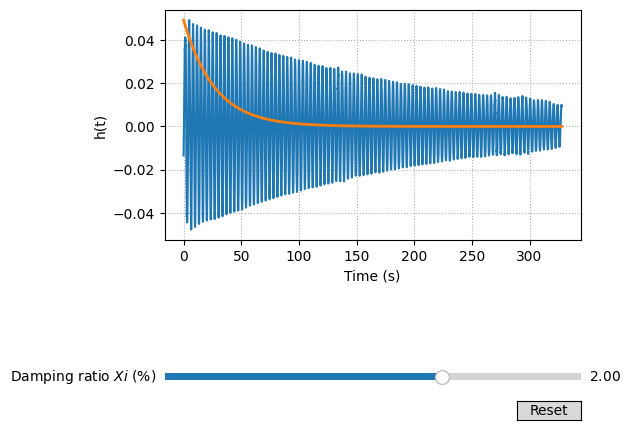

In [24]:
import iplot.interactive_plot_2 as ip
ip.plot_interactive()

<details>
    <summary><b> Click to get the answer</b></summary>
    The damping matches at around 0.24%. That is realistic for a fully steel structure.
</details> 

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.5b:</b> Just for the record can you store your damping value (%) in `damping_owt`?

</div>

In [25]:
### BEGIN SOLUTION
damping_owt = 0.24 # in percent
### END SOLUTION

Let us verify you provided an answer:

In [26]:
assert damping_owt

### BEGIN HIDDEN TESTS
assert (damping_owt>0.2) and (damping_owt<0.3)
### END HIDDEN TESTS

## Exercise 3: the parked turbine

In the field of offshore wind energy the behaviour of a parked turbine (i.e. when it is not producing power) is almost equally important as the behaviour during operating conditions. At some sites the fatigue life is actually determined by the amount of time a turbine spends in parked conditions. A statement like "10% of downtime accounts for 90% of the fatigue life" are not uncommon.

In this exercise we will go to a **different wind farm**, and study the behaviour a turbine that is parked. This time we will have 6 measurement signals, recorded at three different heights of the turbine. In offshore wind turbines the height is often related to a reference called LAT or Lowest Astronomical Tide, the lowest occuring tidal level. So a sensor labeled LAT015 is installed 15 meters above this reference level, and a sensor labeled LAT097 is installed 97m above this reference level. 

<img src="./Images/OWT_sensors.jpg" height=400 />

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.1:</b> Can you use pandas to import the measurement data that is stored in the file `offshore_wind_turbine_parked.csv`? Store the import in the variable `df`.

</div>

In [27]:
###BEGIN SOLUTION
df = pd.read_csv('offshore_wind_turbine_parked.csv', header=0)
df.head()
###END SOLUTION

,t [s],LAT015_FA [g],LAT015_SS [g],LAT069_FA [g],LAT069_SS [g],LAT097_FA [g],LAT097_SS [g]
0,0.000000,-0.000116,0.000933,-0.003958,-0.000331,-0.005789,-0.000708
1,0.033333,-0.000130,0.000880,-0.003935,-0.000378,-0.005720,-0.000597
2,0.066667,-0.000189,0.000795,-0.003988,-0.000392,-0.005695,-0.000540
3,0.100000,-0.000274,0.000691,-0.004161,-0.000350,-0.005655,-0.000540
4,0.133333,-0.000357,0.000587,-0.004419,-0.000322,-0.005550,-0.000573


Let us check your import

In [28]:
assert len(df.columns) == 7, f'Did you import the new data? Your import  has {len(df.columns)} columns, we were expecting 7'

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.2:</b> Use the cell below to find key information about the measurement dataset. Define:

        - The sample frequency in Hz: `f_s`
        - The duration in s: `t_e`
        - The measurement unit of the acceleration: `unit_str`
</div>

In [29]:
###BEGIN SOLUTION
f_s = 30 #Hz
t_e = 600 #s
unit_str = 'g'
###END SOLUTION

Some small checks

In [30]:
assert f_s*t_e == len(df), f'Something does not add up, the data contains {len(df)} samples, yet t_e*f_s={t_e}*{f_s}={t_e*f_s}' # See if the total number of samples adds up

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.3:</b> use the `plt.plot` command to visualize the measurement data. Can you make sure to plot all 6 measurement signals?
</div>

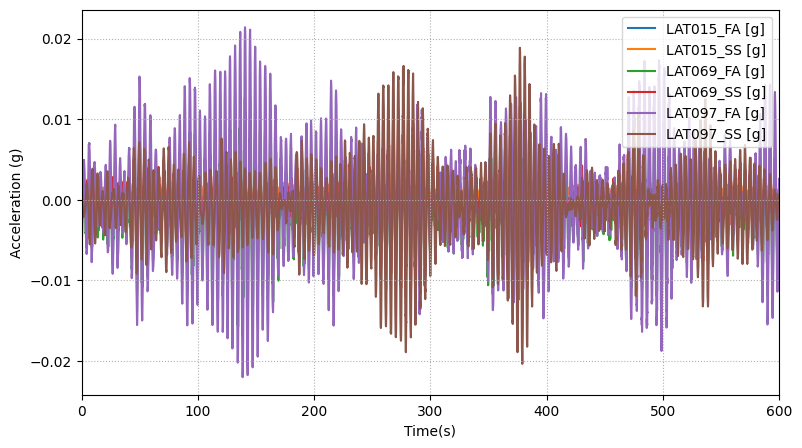

In [31]:
plt.figure(figsize=(9,5))

###BEGIN SOLUTION
for c in list(df.columns)[1:]:
    plt.plot(df['t [s]'],df[c], label=c,zorder=1)

plt.xlim([0,600])
plt.legend()
plt.grid(which='both', linestyle=':')
plt.xlabel('Time(s)')
plt.ylabel(f'Acceleration ({unit_str})')
###END SOLUTION

plt.show()

This timeseries is a bit harder to interpret than that of the previous turbine. Perhaps transforming it into the frequency domain is more helpful in interpreting the results....

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.4:</b> Convert the measurement data to the frequency domain using `calc_spectrum` and plot the resulting amplitude spectra. Use these spectra to estimate the first natural frequency of the structure. Zoom in on the range between 0 and 2 Hz.

</div>

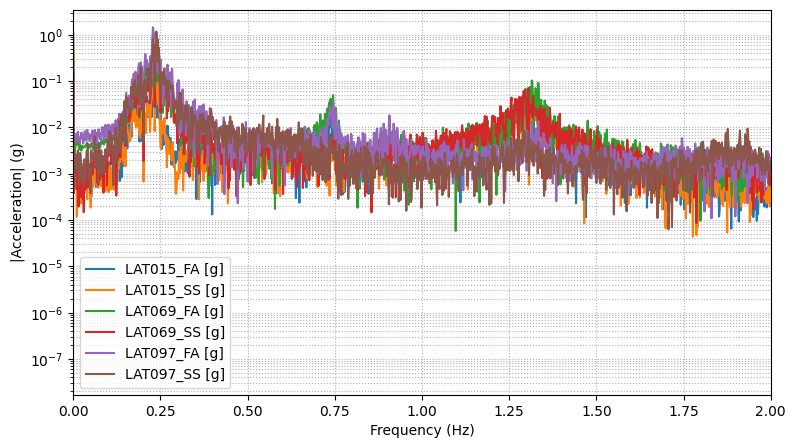

In [32]:
plt.figure(figsize=(9,5))

###BEGIN SOLUTION

for c in list(df.columns)[1:]:
    f, X = calc_spectrum(df[c], fs=f_s)

    fh = int(len(f)/2)
    plt.semilogy(f[fh:], np.abs(X[fh:]), label=c)
plt.xlim([0,2])
plt.legend()
###END SOLUTION

plt.xlabel('Frequency (Hz)')
plt.ylabel('|Acceleration| (g)')
plt.grid(which='both', linestyle=':')
plt.show()


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.5:</b> Try to answer following questions below. 

- How many modes can you spot between 0 and 2Hz?
- At which frequencies are they located? 
- Do you observe differences between the different sensor levels? Can you spot all modes at every level?
- Which mode is dominating the spectrum, i.e. carries the most energy?

</div>

<details>
    <summary><b> Click to get the answer</b></summary>
    
- There are 3 notable modes visible in the spectrum. Potentially there are more hidden underneath the noise.

- The first is around 0.23Hz, the second at around 0.75Hz and the third at around 1.34Hz
- Depending on which mode you consider a different sensor has the highest energy. E.g. for the first mode the sensors that carry the most energy are the top (LAT097) sensors. Meanwhile for the mode at 1.34Hz the lower sensors (LAT069 and LAT015) carry more energy
- The spectrum is dominated by the first mode at 0.23Hz, it contains by far the most energy.  
</details> 

These measurements can also provide us some insight into the mode shapes. While we can't derive the modeshapes directly from the spectrum we can visualize the so-called Operational Deflection Shapes (ODS) from it. These show how the structure vibrates at a given frequency. In particular at (well-seperated) resonance frequencies, these will resemble the mode shapes.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.6:</b> Use the widget below to visualize the ODS at various frequencies for the FA signals. Can you relate the observed ODS to expected structural modes of the system?

</div>

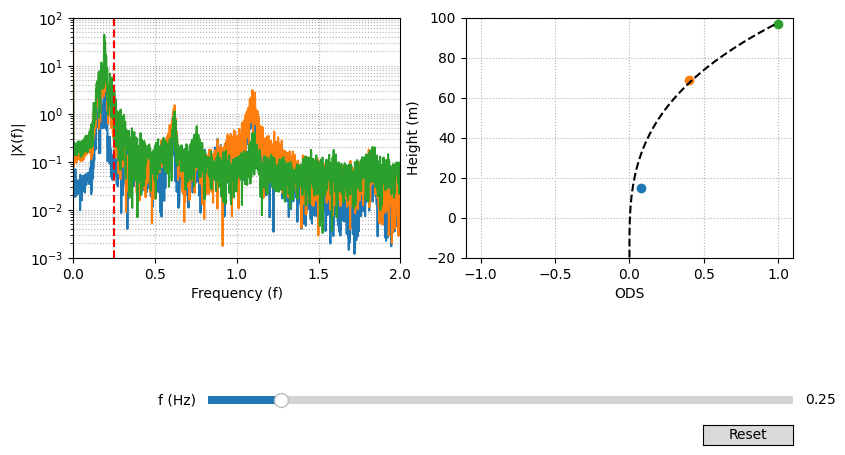

In [33]:
import iplot.interactive_plot_3 as ip
ip.plot_interactive()

Addtionally, I would like to share with you a very usefull tip when handling real-world data. In this sessions we talke about calculating spectra and windows. We did not speak of noise. The latter is always present and to some level will limit what we can do with measurements. When noise is too bad our signal will get flooded by noise and we won't be able to see what is going on. To resolve this we can work with averaging. A proper way of doing this is the so-called Welch's method.

Welch's method is a way to compute the **Power Spectral Density (PSD)** of a signal. Welch's method is available from `scipy.signal` as `welch`. `welch` does not only provide an implementation of Welch's method, it also simplifies the process of using a window.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.7:</b> Import `welch` from `scipy.signal` and use it to calculate the PSD of the measurement data at LAT015 in the FA-direction contained in the dataframe `df`. Store the resulting frequency vectors as `f_psd` and the PSD itself as `psd`. Consider different settings of the windowing length and the window type. Also set the variable `psd_y_label` label to correct engineering units knowing the time domain signal is `g`. e.g. `psd_y_label='g'`
</div>


In [34]:
### BEGIN SOLUTION
from scipy.signal import welch

f_psd_FA_LAT97, psd_FA_LAT97 = welch(df['LAT097_FA [g]'].to_numpy(), fs=f_s, window=hann(f_s*60))
f_psd_SS_LAT97, psd_SS_LAT97 = welch(df['LAT097_SS [g]'].to_numpy(), fs=f_s, window=hann(f_s*60))

f_psd_FA_LAT69, psd_FA_LAT69 = welch(df['LAT069_FA [g]'].to_numpy(), fs=f_s, window=hann(f_s*60))
f_psd_SS_LAT69, psd_SS_LAT69 = welch(df['LAT069_SS [g]'].to_numpy(), fs=f_s, window=hann(f_s*60))

f_psd_FA_LAT15, psd_FA_LAT15 = welch(df['LAT015_FA [g]'].to_numpy(), fs=f_s, window=hann(f_s*60))
f_psd_SS_LAT15, psd_SS_LAT15 = welch(df['LAT015_SS [g]'].to_numpy(), fs=f_s, window=hann(f_s*60))

psd_y_label = 'g²/Hz'
### END SOLUTION

Let us have a look at your results:

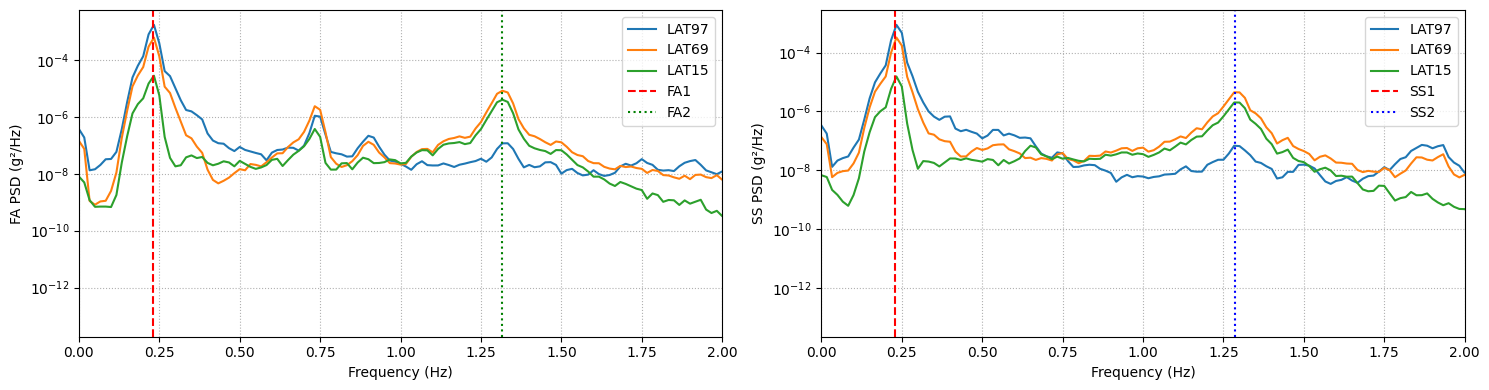

In [35]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].semilogy(f_psd_FA_LAT97, psd_FA_LAT97, label='LAT97')
ax[0].semilogy(f_psd_FA_LAT69, psd_FA_LAT69, label='LAT69')
ax[0].semilogy(f_psd_FA_LAT15, psd_FA_LAT15, label='LAT15')
ax[0].set_xlim([0,2])
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel(f'FA PSD ({psd_y_label})')
ax[0].grid(which='both', linestyle=':')
ax[0].axvline(x=0.23, color='r', linestyle='--', label='FA1')
ax[0].axvline(x=1.314, color='g', linestyle=':', label='FA2')
ax[0].legend()
ax[1].semilogy(f_psd_SS_LAT97, psd_SS_LAT97, label='LAT97')
ax[1].semilogy(f_psd_SS_LAT69, psd_SS_LAT69, label='LAT69')
ax[1].semilogy(f_psd_SS_LAT15, psd_SS_LAT15, label='LAT15')
ax[1].set_xlim([0,2])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel(f'SS PSD ({psd_y_label})')
ax[1].axvline(x=0.23, color='r', linestyle='--', label='SS1')
ax[1].axvline(x=1.286, color='b', linestyle=':', label='SS2')
ax[1].grid(which='both', linestyle=':')
ax[1].legend()
plt.tight_layout()
### END SOLUTION

# Exercise 4: Operational Modal Analysis (OMA)

OMA is a **technique** used to identify the dynamic characteristics (natural frequencies, damping ratios, and mode shapes) of a structure **under its actual operating conditions**.  
Unlike traditional Experimental Modal Analysis (EMA), which requires **known excitation forces**, OMA relies only on **output measurements** (e.g., acceleration, displacement, or strain) recorded during ambient or operational loading.

OMA is particularly useful for **large and complex structures**—such as offshore wind turbines—where controlled excitation is impractical or impossible.  
In such cases, the ambient excitations (e.g., wind, waves, and machinery loads) are assumed to be **broadband and stochastic**, exciting the structure across a range of frequencies.

---



<img src="./Images/OMA.png" height=600 />

The general workflow of OMA involves:
1. **Data acquisition** – measuring responses (e.g., accelerations) at multiple points on the structure.  
2. **Preprocessing** – filtering, downsampling, and segmenting the data.  
3. **System identification** – estimating the modal parameters using algorithms such as:
   - Frequency Domain Decomposition (FDD)
   - Stochastic Subspace Identification (SSI)
   - Least-Squares Complex Frequency (LSCF)

4. **Modal validation** – evaluating stability diagrams and selecting consistent physical modes.

---

## OMA for Offshore Wind Turbines

In offshore wind turbines, OMA allows the extraction of:
- **Tower and blade natural frequencies** under operating wind and wave loads  
- **Damping ratios** influenced by aerodynamic and hydrodynamic effects  
- **Mode shapes** for structural health monitoring and model validation  

#### In this workshop, we will apply OMA algorithms using the **pyOMA2** package to the acceleration signals we used in the parked condtion above.
---

First we will import the necessary packages.

In [2]:
import numpy as np
import pandas as pd
from pyoma2.algorithms import SSI, FSDD, pLSCF
from pyoma2.setup import SingleSetup

Loading the data

In [ ]:
# Read Parquet file with Pandas: 
file_path_parked = 'NRT-WTG_Parked.parquet.gz' 
file_path_rated = 'NRT-WTG_Rated.parquet.gz' 
data_parked = pd.read_parquet(file_path_parked) 
data_rated = pd.read_parquet(file_path_rated) 

# Add case_ID column to each dataset
data_parked["case_ID"] = "parked"
data_rated["case_ID"] = "rated"

data_ = pd.concat([data_parked, data_rated]).sort_index()

data_

# or 
# deg230_data = pd.read_pickle("deg230_data.pkl")

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 4.1:</b> Store the 6 signals from ecercise 3 in the varaible `parked_signals`. Also store the sampling frequncy of the signals in `parked_fs`.
</div>



In [3]:
file_path_parked = 'NRT-WTG_Parked.parquet_z.gz' 
data_parked = pd.read_parquet(file_path_parked) 

In [4]:
data_parked

,MP_FBG_LATmin019_DEG255_0_nr1 [microstrain],TW_ACC_LAT069_DEG060_Y_nr2 [g],MP_FBG_LATmin017_DEG165_0_nr1 [microstrain],TP_SG_LAT014_DEG050_0_nr1 [microstrain],winddirection [°],rotorspeed [rpm],pitch [°],TW_ACC_LAT097_DEG060_Y_nr2 [g],power [kW],TP_SG_LAT014_DEG350_0_nr1 [microstrain],...,TW_ACC_LAT069_DEG060_X_nr1 [g],TP_ACC_LAT015_DEG240_X_nr1 [g],TP_ACC_LAT015_DEG240_Y_nr2 [g],MP_FBG_LATmin019_DEG165_0_nr1 [microstrain],TP_SG_LAT014_DEG170_0_nr1 [microstrain],TW_ACC_LAT097_DEG060_X_nr1 [g],TP_SG_LAT014_DEG230_0_nr1 [microstrain],MP_FBG_LATmin017_DEG255_0_nr1 [microstrain],TP_SG_LAT014_DEG110_0_nr1 [microstrain],TP_SG_LAT014_DEG290_0_nr1 [microstrain]
2020-07-03 01:30:00+00:00,-855.745789,0.003984,390.335541,478.673737,272.6,0.0,20.0,0.002021,-93.2,658.167175,...,0.007025,-0.001281,-0.001647,283.313690,1365.870117,0.009428,702.827271,-840.999878,1981.487427,596.668701
2020-07-03 01:30:00.010000+00:00,-855.945496,NaN,390.436554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,283.313690,NaN,NaN,NaN,-840.999878,NaN,NaN
2020-07-03 01:30:00.020000+00:00,-855.745789,NaN,390.032501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,282.910980,NaN,NaN,NaN,-840.899658,NaN,NaN
2020-07-03 01:30:00.030000+00:00,-856.047302,NaN,390.436554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,283.011658,NaN,NaN,NaN,-840.999878,NaN,NaN
2020-07-03 01:30:00.033333+00:00,NaN,0.004064,NaN,478.942291,NaN,NaN,NaN,0.001744,NaN,658.794373,...,0.007096,-0.001347,-0.001833,NaN,1365.240601,0.009480,702.653137,NaN,1981.133179,597.028625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-03 03:19:59.960000+00:00,-870.135742,NaN,381.546936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,274.554504,NaN,NaN,NaN,-855.138977,NaN,NaN
2020-07-03 03:19:59.960667+00:00,NaN,0.001179,NaN,497.300110,NaN,NaN,NaN,-0.001630,NaN,672.155396,...,-0.000309,0.000661,-0.000532,NaN,1350.379028,-0.000863,686.057373,NaN,1984.133789,593.097290
2020-07-03 03:19:59.970000+00:00,-870.135742,NaN,381.850006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,274.453857,NaN,NaN,NaN,-855.239197,NaN,NaN
2020-07-03 03:19:59.980000+00:00,-870.135742,NaN,381.344910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,274.252472,NaN,NaN,NaN,-855.239197,NaN,NaN


In [ ]:
# Read Parquet file with Pandas: 
file_path_parked = 'NRT-WTG_Parked.parquet.gz' 
file_path_rated = 'NRT-WTG_Rated.parquet.gz' 
data_parked = pd.read_parquet(file_path_parked) 
data_rated = pd.read_parquet(file_path_rated)
 
# Add case_ID column to each dataset
data_parked["case_ID"] = "parked"
data_rated["case_ID"] = "rated"
 
data_ = pd.concat([data_parked, data_rated]).sort_index()
 
data_

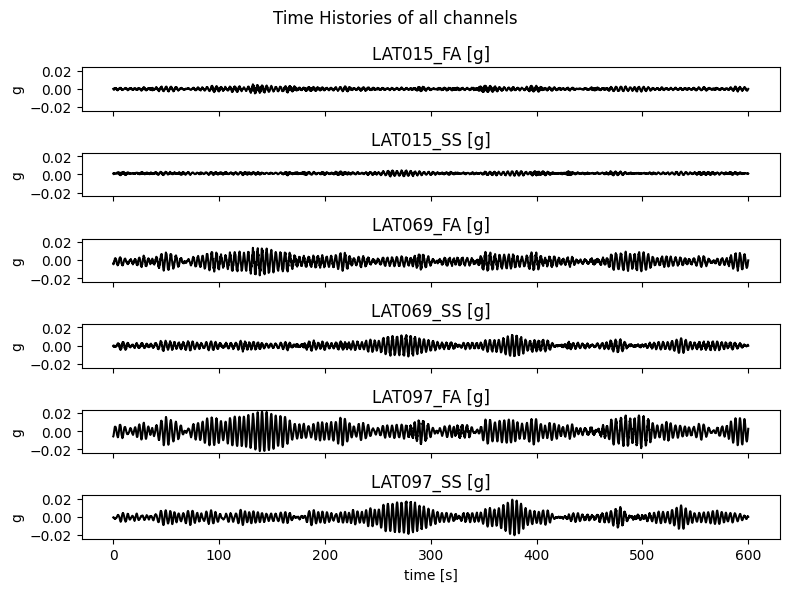

In [37]:
parked_signals = None
parked_fs = None
### BEGIN SOLUTION
# parked_signals = df[[c for c in df.columns if c!='t [s]']].to_numpy()
parked_signals = df.drop(columns=['t [s]']).to_numpy()
# parked_signals = df.iloc[:, 1:].to_numpy()
parked_fs = 30
### END SOLUTION
signals = SingleSetup(parked_signals, fs=parked_fs)
signals.plot_data(names=[c for c in df.columns if c!='t [s]'], unit='g')
plt.show()

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 4.2:</b> Use the `FSDD` function applied to `signals`. Store you results in `FSDD_results`.

**Tip**: Use `FSDD(name="FSDD", nxseg=1024)`

</div>

2025-11-19 09:51:08,402 - pyoma2.setup.base - INFO - Running FSDD... (base:123)


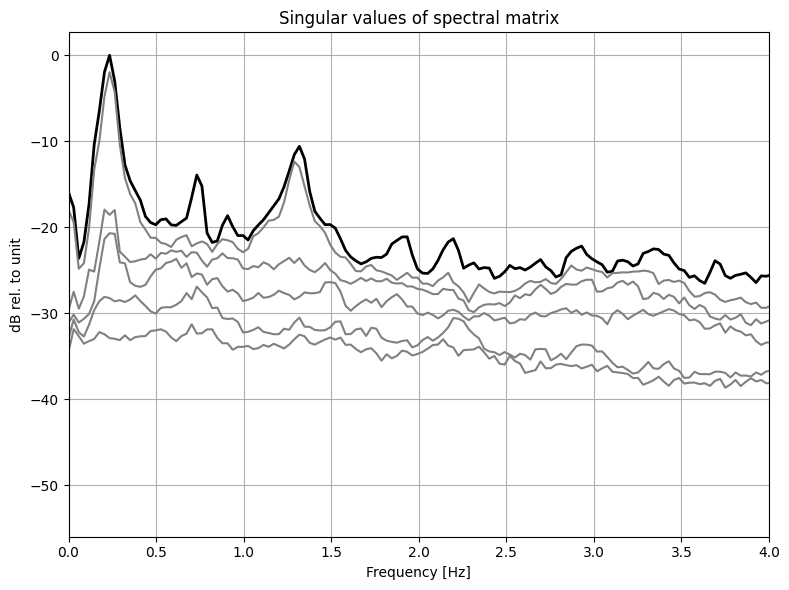

In [38]:
FSDD_results = None
### BEGIN SOLUTION
FSDD_results = FSDD(name="FSDD", nxseg=1024)
### END SOLUTION
signals.add_algorithms(FSDD_results)
signals.run_by_name("FSDD")
_, _ = FSDD_results.plot_CMIF(freqlim=(0,4))


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 4.3:</b> Use the `SSI` function applied to `signals`. Store you results in `SSI_results`.

**Tip**: Use `SSI(name="SSIcov", method="cov", br=60, ordmax=60)`

</div>

2025-11-19 09:51:08,586 - pyoma2.setup.base - INFO - Running SSIcov... (base:123)
2025-11-19 09:51:08,587 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:89)
2025-11-19 09:51:09,134 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:462)
100%|██████████| 41/41 [00:00<00:00, 297.82it/s]
2025-11-19 09:51:09,280 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:628)
100%|██████████| 41/41 [00:00<00:00, 582.22it/s]


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Frequency-Damping Clustering'}, xlabel='Frequency [Hz]', ylabel='Damping'>)

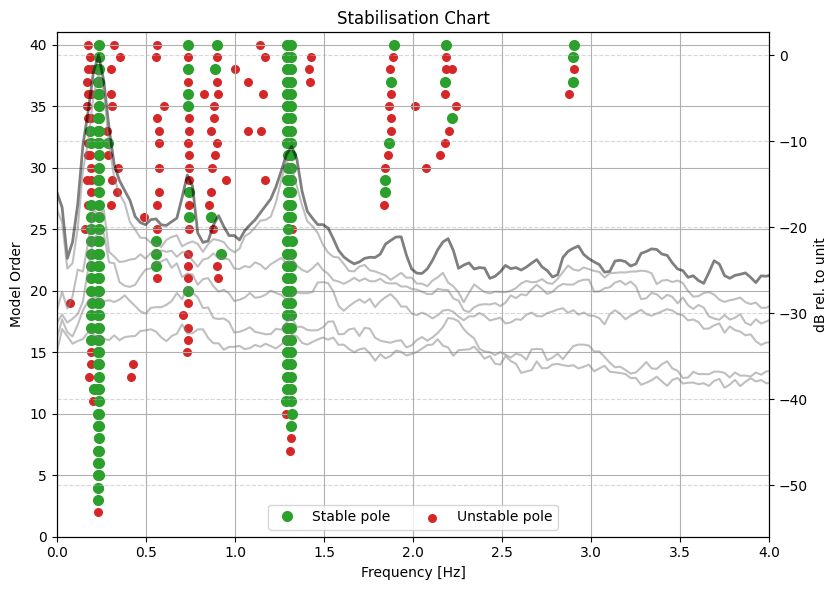

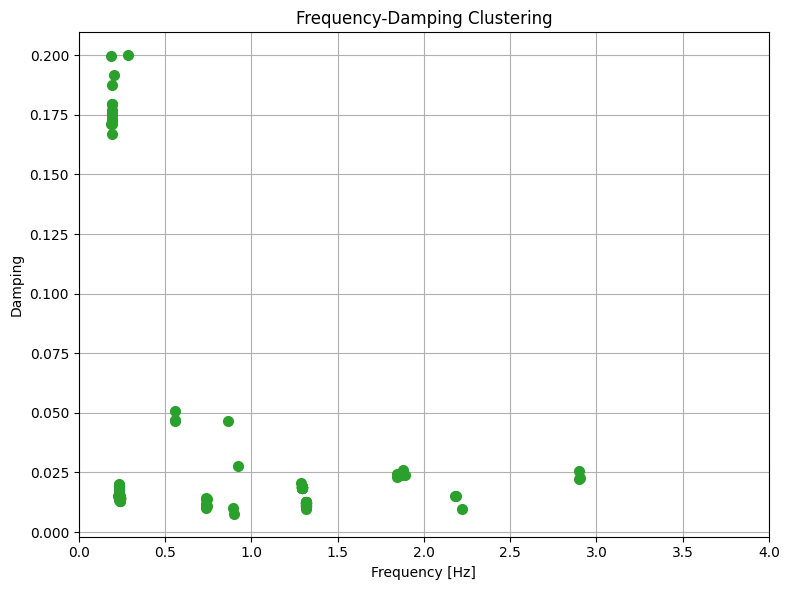

In [39]:
SSI_results = None
### BEGIN SOLUTION
SSI_results = SSI(name="SSIcov", method="cov", br=60*2, ordmax=40)
### END SOLUTION
signals.add_algorithms(SSI_results)
signals.run_by_name("SSIcov")
SSI_results.plot_stab(freqlim=(0,4), hide_poles=False, spectrum=True)
SSI_results.plot_freqvsdamp(freqlim=(0,4))

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 4.4:</b> Use the `pLSCF` function applied to `signals`. Store you results in `LSCF_results`.

**Tip**: Use `pLSCF(name="polymax",ordmin=0,ordmax=40,method_SD="cor",nxseg=1024*2)`

</div>

2025-11-19 09:51:09,789 - pyoma2.setup.base - INFO - Running polymax... (base:123)
100%|██████████| 40/40 [00:06<00:00,  6.21it/s]


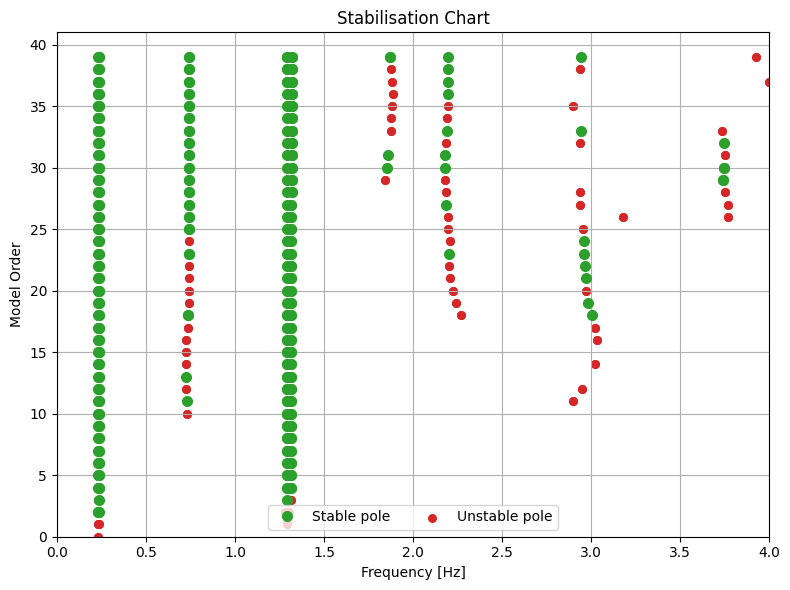

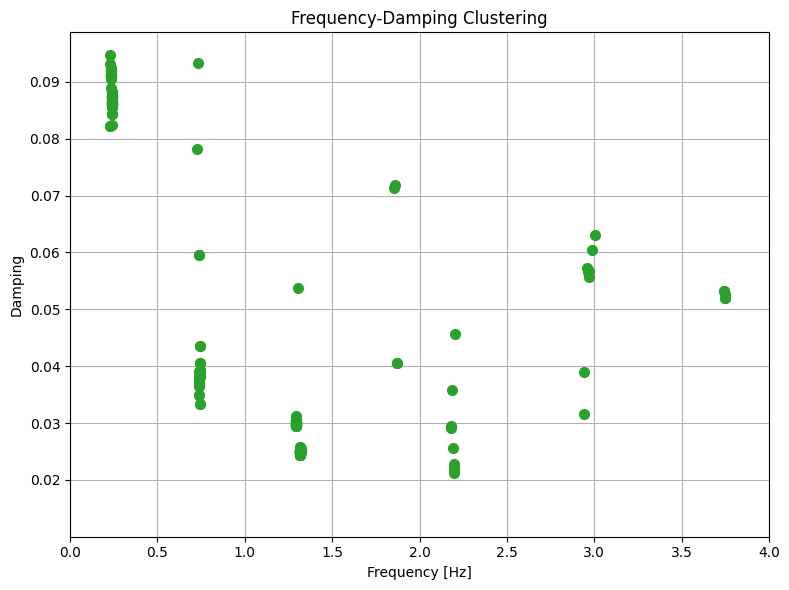

In [40]:
LSCF_results = None
### BEGIN SOLUTION
LSCF_results = pLSCF(name="polymax",ordmin=0,ordmax=40,method_SD="cor",nxseg=1024*2)
### END SOLUTION
signals.add_algorithms(LSCF_results)
signals.run_by_name("polymax")
LSCF_results.plot_stab(freqlim=(0,4), hide_poles=False)
LSCF_results.plot_freqvsdamp(freqlim=(0,4))
plt.tight_layout()

<div class="alert alert-block alert-info">
<center><b>This concludes this workshop, hope you learned a thing or two..</b></center></div> 